# SYDE 671, A1
## Tongdan Su, 20754736

1. Implement my_imfilter function

In [26]:
import numpy as np
from numpy import pi, exp, sqrt
from skimage import io, img_as_ubyte, img_as_float32
from skimage.transform import rescale
 
def my_imfilter(image, filter):
    filtered_image = np.asarray([0])
    kernel = filter
    kh, kw = kernel.shape
    if (kh % 2==0 )or (kw % 2==0):
        raise ValueError("Kernel size must be odd.")
    #In case of greyimage
    if len(image.shape) == 2:
        image = np.expand_dims(image, axis=2)
    #Padding with 0
    padh = (kh) // 2 
    padw = (kw) // 2  
    img_pad = np.pad(image,[(padh,padh),(padw,padw), (0,0)], mode="constant")
    imgh, imgw, _ = img_pad.shape 
    result = list()
    for h in range(0,imgh-kh+1):
        for w in range(0,imgw-kw+1):
            y = 0
            tmp_img = img_pad[h:h+kh, w:w+kw]
          # Convolution operation
            for kh_ix in range(kh):
                for kw_ix in range(kw):
                      y += tmp_img[kh_ix, kw_ix] * kernel[kh-1-kh_ix, kw-1-kw_ix]
            result.append(y)

    img_conv = np.array(result).astype(np.uint8).reshape(image.shape)

    filtered_image = img_conv

    return filtered_image
 


Original image is showed as below


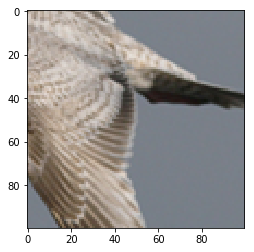

In [30]:
from matplotlib.pyplot import imread, imshow
img = imread("./bird.bmp")[150:250,200:300,:]
print('Original image is showed as below:')
imshow(img)


Filtered image is showed as below


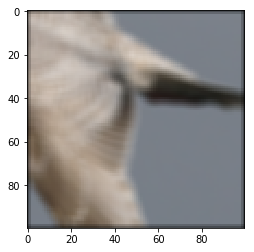

In [31]:
kh, kw = 5, 5  # Kernel height, width
kernel = np.ones((kh, kw)) / (kh * kw)
filtered_image=my_imfilter(img,kernel)
print('Filtered image is showed as below:')
imshow(filted_image)

2. Implement hybrid image generator and visualizer function

In [71]:
def gen_hybrid_image(image1, image2, cutoff_frequency):
#   """
#    Inputs:
#    - image1 -> The image from which to take the low frequencies.
#    - image2 -> The image from which to take the high frequencies.
#    - cutoff_frequency -> The standard deviation, in pixels, of the Gaussian
#                          blur that will remove high frequencies.
 
#    Task:
#    - Use my_imfilter to create 'low_frequencies' and 'high_frequencies'.
#    - Combine them to create 'hybrid_image'.
#   """
 
    assert image1.shape[0] == image2.shape[0]
    assert image1.shape[1] == image2.shape[1]
    assert image1.shape[2] == image2.shape[2]
 
  # Steps:
  # (1) Remove the high frequencies from image1 by blurring it. The amount of
  #     blur that works best will vary with different image pairs
  # generate a 1x(2k+1) gaussian kernel with mean=0 and sigma = s, see https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
    
    s, k = cutoff_frequency, cutoff_frequency*2
    probs = np.asarray([exp(-z*z/(2*s*s))/sqrt(2*pi*s*s) for z in range(-k,k+1)], dtype=np.float32)
    kernel = np.outer(probs, probs)
    print(kernel.shape)
    # Your code here:
    low_frequencies = my_imfilter(image1, kernel) 

    # (2) Remove the low frequencies from image2. The easiest way to do this is to
    #     subtract a blurred version of image2 from the original version of image2.
    #     This will give you an image centered at zero with negative values.
    # Your code here #
    high_frequencies = image2 - my_imfilter(image2, kernel) 

    # (3) Combine the high frequencies and low frequencies
    # Your code here #
    hybrid_image = low_frequencies + high_frequencies

    # (4) At this point, you need to be aware that values larger than 1.0
    # or less than 0.0 may cause issues in the functions in Python for saving
    # images to disk. These are called in proj1_part2 after the call to 
    # gen_hybrid_image().
    # One option is to clip (also called clamp) all values below 0.0 to 0.0, 
    # and all values larger than 1.0 to 1.0.
    hybrid_image = np.clip(hybrid_image, 0.0, 1.0)
    low_frequencies = np.clip(low_frequencies, 0.0, 1.0)
    high_frequencies = np.clip(high_frequencies, 0.0, 1.0)

    return high_frequencies,low_frequencies, hybrid_image
 
def vis_hybrid_image(hybrid_image):
#   """
#   Visualize a hybrid image by progressively downsampling the image and
#   concatenating all of the images together.
#   """
    scales = 5
    scale_factor = 0.5
    padding = 5
    original_height = hybrid_image.shape[0]
    num_colors = 1 if hybrid_image.ndim == 2 else 3

    output = np.copy(hybrid_image)
    cur_image = np.copy(hybrid_image)
    for scale in range(2, scales+1):
    # add padding
        output = np.hstack((output, np.ones((original_height, padding, num_colors),
                                            dtype=np.float32)))
        # downsample image
        cur_image = rescale(cur_image, scale_factor, mode='reflect')
        # pad the top to append to the output
        pad = np.ones((original_height-cur_image.shape[0], cur_image.shape[1],
                       num_colors), dtype=np.float32)
        tmp = np.vstack((pad, cur_image))
        output = np.hstack((output, tmp)).astype(np.uint8)
    return output
 
def load_image(path):
    return img_as_float32(io.imread(path))
 
def save_image(path, im):
    return io.imsave(path, img_as_ubyte(im.copy()))

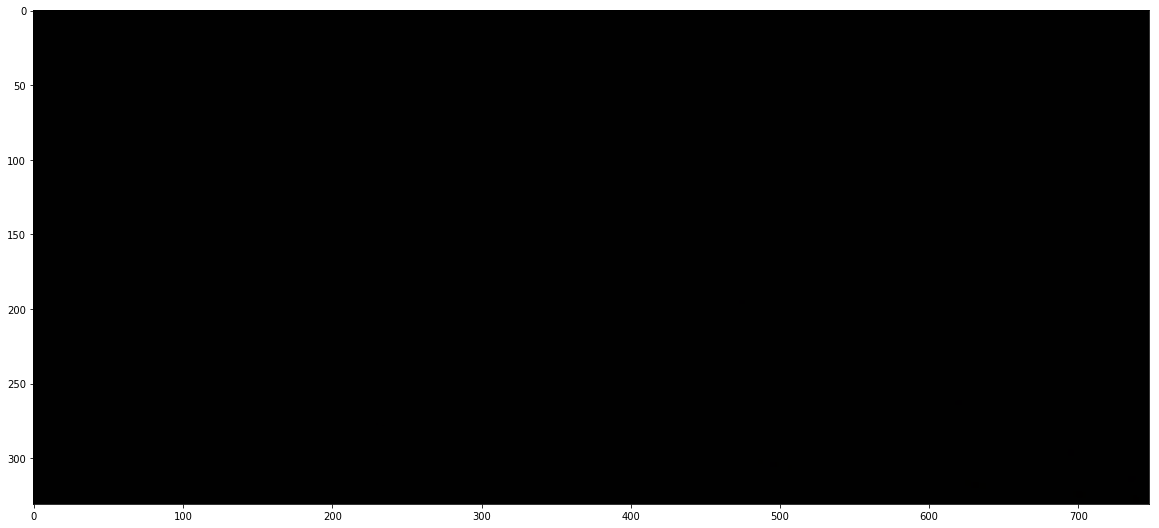

In [59]:
import matplotlib.pyplot as plt
img1 = imread("./bird.bmp")
img2 = imread("./plane.bmp")
hybrid_image0=gen_hybrid_image(img1, img2, 7)
vis = vis_hybrid_image(hybrid_image0)
plt.figure(figsize=(20, 20))
plt.imshow(vis);

### Write-up

However, as shown above, after the hybrid image generator function implemented, the final result was like a black image instead of the hybrid image.

(21, 21)


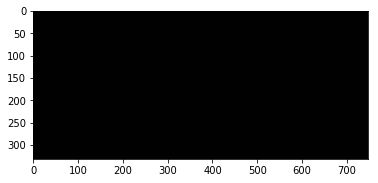

In [75]:
high_fre0,low_fre0,hybrid_image0=gen_hybrid_image(img1, img2,5 )
vis = vis_hybrid_image(hybrid_image0)
plt.imshow(hybrid_image)

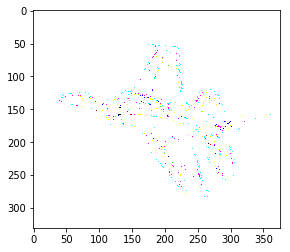

In [73]:
#hybrid_image1=gen_hybrid_image(img1, img2,1 )
#vis = vis_hybrid_image(hybrid_image0)
plt.imshow(high_fre0)

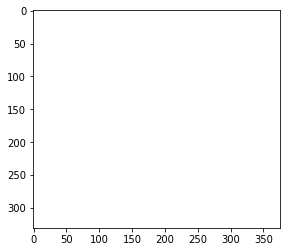

In [74]:
#hybrid_image2=gen_hybrid_image(img1, img2,9 )
#vis = vis_hybrid_image(low_fre0)
plt.imshow(low_fre0)